# Assignment 1, Gradient Descent

## Pooria Taheri

In [ ]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip -o AirQualityUCI.zip

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

### Extracting data_set from CSV file

In [20]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',',
                        usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data[:46]  # only use the first 46 samples
data = data.dropna(axis=0)
    
hour = np.array([int(t[:2]) for t in data['Time']])
CO = np.array(data['CO(GT)'])

T = CO.reshape(-1, 1)
Tnames = ['CO']
X = hour.reshape(-1, 1)
Xnames = ['Hour']
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)

X.shape = (43, 1) Xnames = ['Hour']
T.shape = (43, 1) Tnames = ['CO']


### CO(GT) air quality Vs. the hour of the day plot

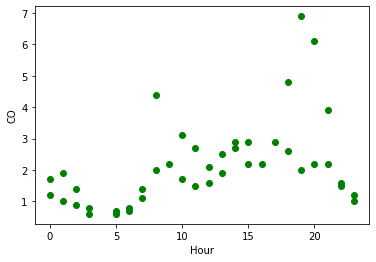

In [21]:
plt.plot(X,T,'o', color='green')
plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0]);

### Linear Model

In [22]:
def linear_model(X, W):
    # W is column vector
    return X @ W[1:, :] + W[0,:]

In [23]:
def linear_model_gradient(X, T, W):
    dEdY = -2*(T - linear_model(X, W))
    dYdW = np.insert(X, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

### Quadratic Model

In [24]:
def quadratic_model(X, W):
    # W is column vector
    return np.hstack((X, X**2)) @ W[1:, :] + W[0, :]

def quadratic_model_gradient(X, T, W):
    dEdY = -2 * (T - quadratic_model(X, W))
    all_but_bias = np.hstack((X, X**2))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

### Cubic Model

In [69]:
def cubic_model(X, W):
    return np.hstack((X, X**2, X**3)) @ W[1:, :] + W[0, :]

def cubic_model_gradient(X, T, W):
    dEdY = -2 * (T - cubic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

### Quartic Model

In [26]:
def quartic_model(X, W):
    return np.hstack((X, X**2, X**3, X**4)) @ W[1:, :] + W[0, :]

def quartic_model_gradient(X, T, W):
    dEdY = -2 * (T - quartic_model(X, W))
    all_but_bias = np.hstack((X, X**2, X**3, X**4))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

### Gradient Descent Adam

In [70]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, n_steps):
    # Commonly used parameter values
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    
    for step in range(n_steps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= rho * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence

def rmse(model, X, T, W):
    Y = model(X, W)
    return np.sqrt(np.mean((T - Y)**2))

Sine Function model is :
$$ 
\begin{align*}
y &= w_0 + w_1 X + w_2 sin(X)
\end{align*}
$$

In [51]:
def sin_model(X, W):
    return np.hstack((X, np.sin(X))) @ W[1:, :] + W[0, :]

def sin_model_gradient(X, T, W):
    dEdY = -2 * (T - sin_model(X, W))
    all_but_bias = np.hstack((X, np.sin(X)))
    dYdW = np.insert(all_but_bias, 0, 1, axis=1)
    result = dEdY.T @ dYdW / X.shape[0]
    return result.T

### Sine Model with different learning rates

Final RMSE for rho 0.01 at step 3000 is 1.078199
Final RMSE for rho 0.0001 at step 3000 is 1.120846
Final RMSE for rho 1e-06 at step 3000 is 1.582607
Final RMSE for rho 1e-08 at step 3000 is 1.594296
Final RMSE for rho 1e-10 at step 3000 is 1.594413


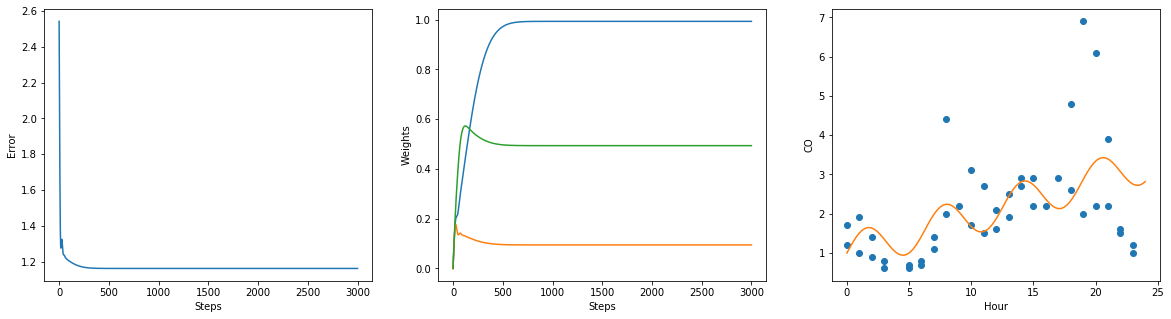

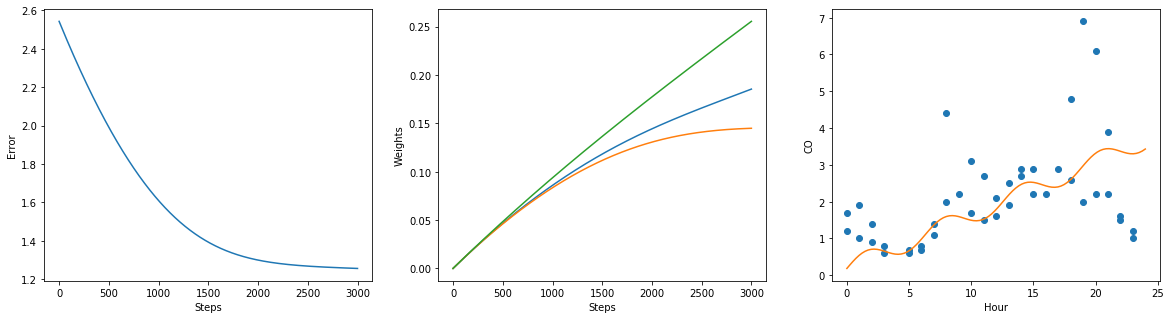

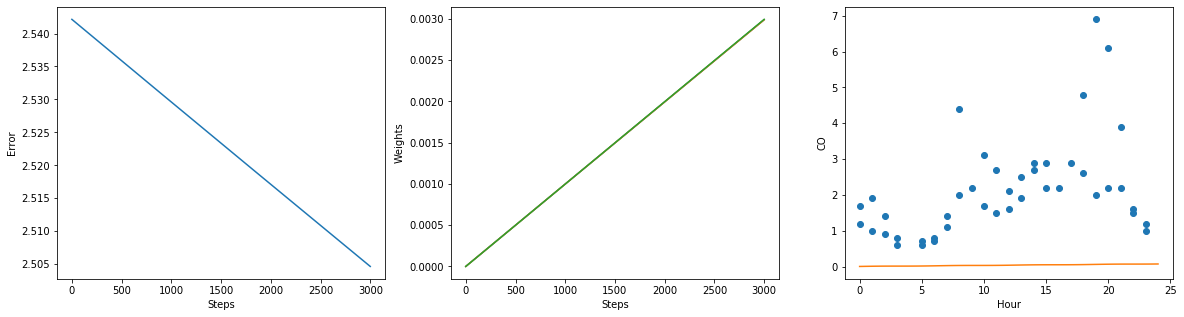

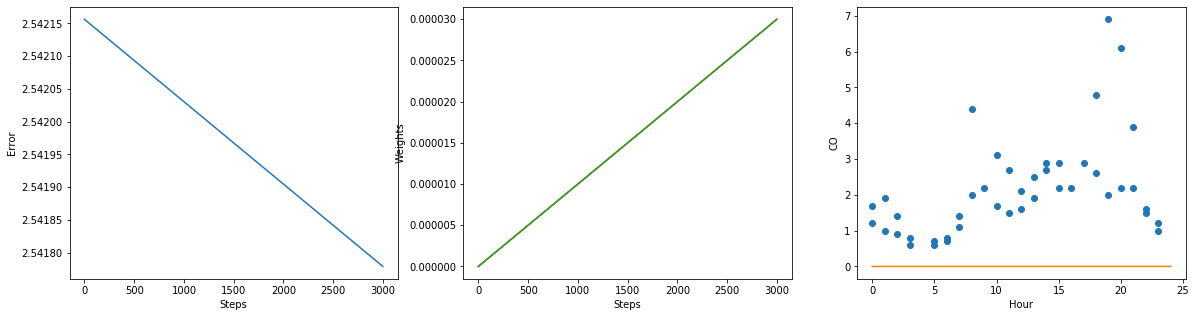

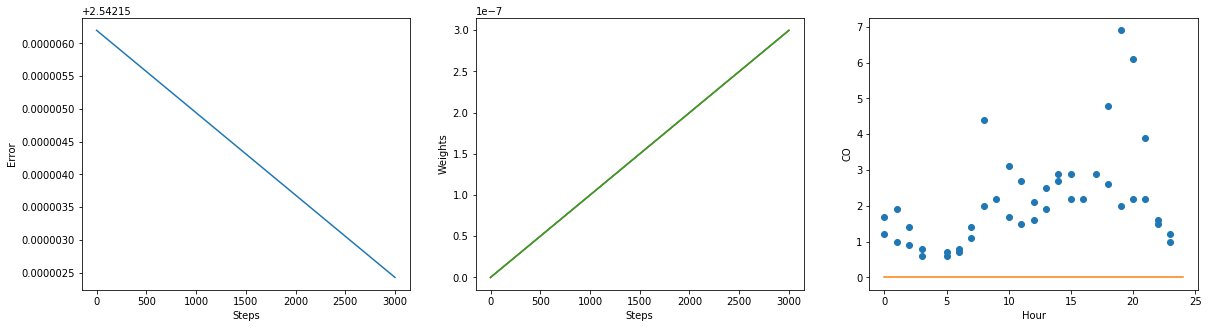

In [77]:
rhos = [1.e-2, 1.e-4, 1.e-6, 1.e-8, 1.e-10]
for i in rhos:
    W = np.zeros((3, 1))
    rho = i 
    n_steps = 3000
    W, error_sequence, W_sequence = gradient_descent_adam(sin_model, sin_model_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.xlabel('Steps')
    plt.ylabel('Error')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.xlabel('Steps')
    plt.ylabel('Weights')
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 24 , 100).reshape(-1, 1)
    plt.plot(xs, sin_model(xs, W))
    plt.xlabel('Hour')
    plt.ylabel('CO')


Adam algorithm takes different learning rate. I chose 1.e-2 to 1.e-10. As it is shown in the plots when learning rate is too small, you can’t find  a good minimum in comparison to bigger steps in early steps. For improving this one can increase the number of steps which will increase the computation load and make the training phase much more time consuming.


### Linear Model with 5 different learning rates 

Final RMSE for rho 0.01 at step 3000 is 1.100504
Final RMSE for rho 0.0001 at step 3000 is 1.141051
Final RMSE for rho 1e-06 at step 3000 is 1.582756
Final RMSE for rho 1e-08 at step 3000 is 1.594297
Final RMSE for rho 1e-10 at step 3000 is 1.594413


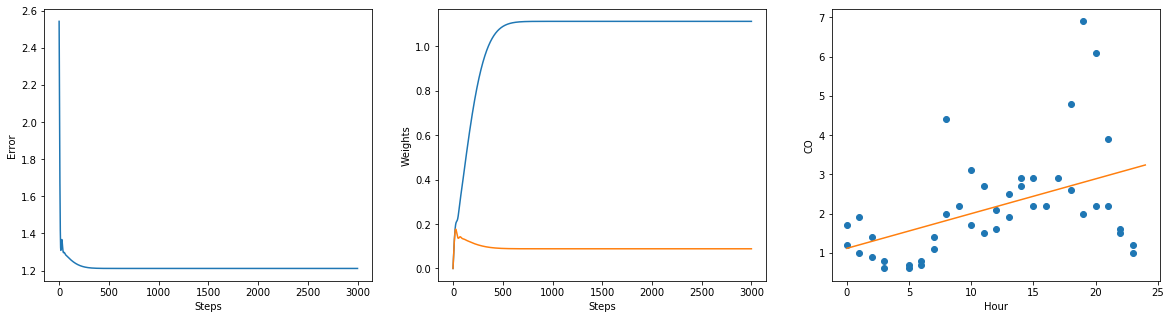

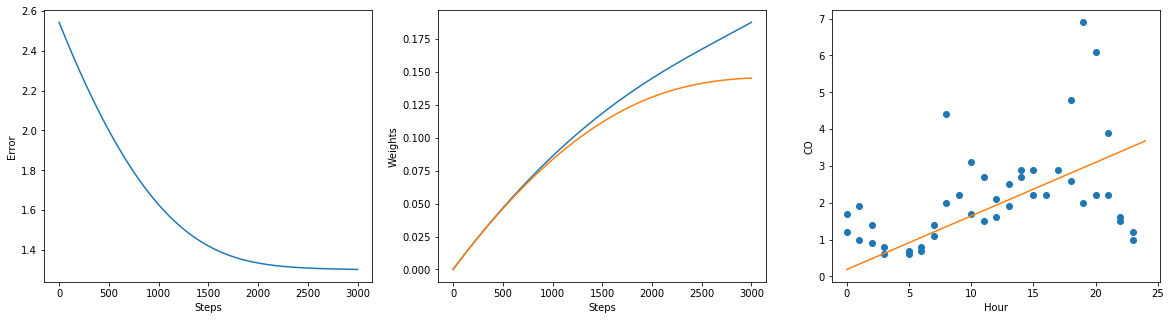

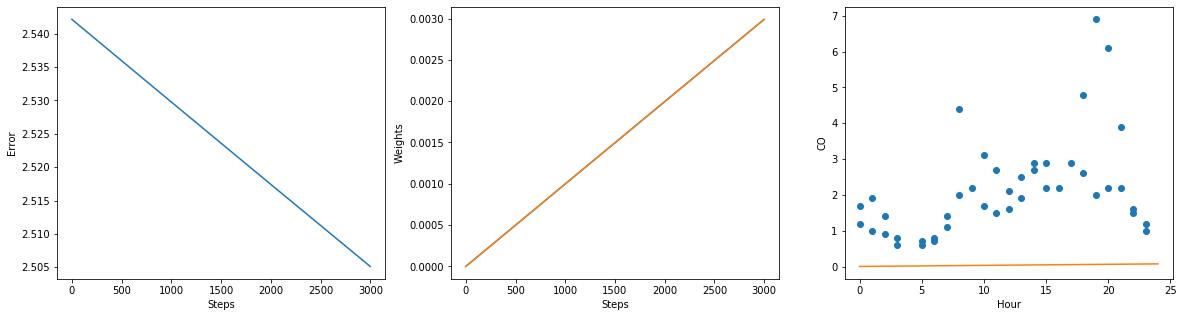

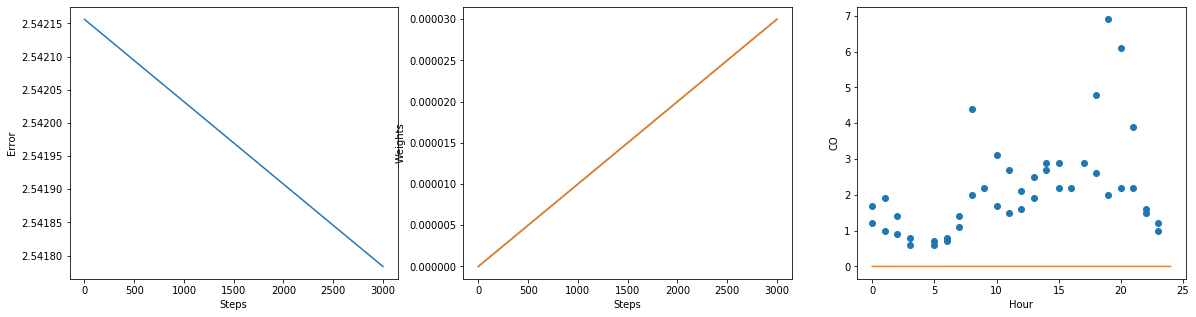

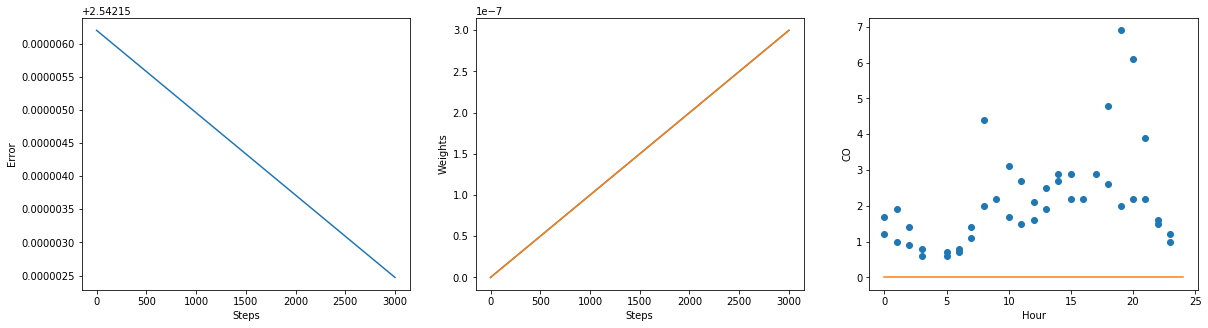

In [78]:
rhos = [1.e-2, 1.e-4, 1.e-6, 1.e-8, 1.e-10]
for i in rhos:
    W = np.zeros((2, 1))
    rho = i 
    n_steps = 3000
    W, error_sequence, W_sequence = gradient_descent_adam(linear_model, linear_model_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.xlabel('Steps')
    plt.ylabel('Error')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.xlabel('Steps')
    plt.ylabel('Weights')
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 24 , 100).reshape(-1, 1)
    plt.plot(xs, linear_model(xs, W))
    plt.xlabel('Hour')
    plt.ylabel('CO')

### Quadratic Model with 5 different learning rate

Final RMSE for rho 0.01 at step 3000 is 1.087891
Final RMSE for rho 0.0001 at step 3000 is 1.122365
Final RMSE for rho 1e-06 at step 3000 is 1.424873
Final RMSE for rho 1e-08 at step 3000 is 1.592491
Final RMSE for rho 1e-10 at step 3000 is 1.594395


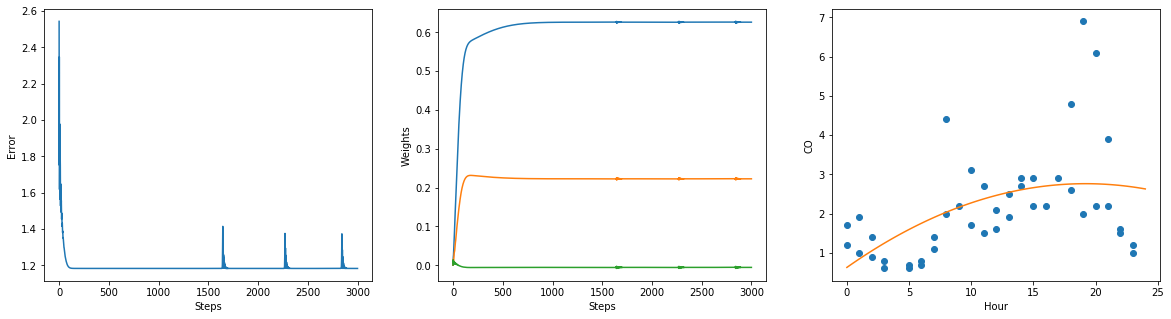

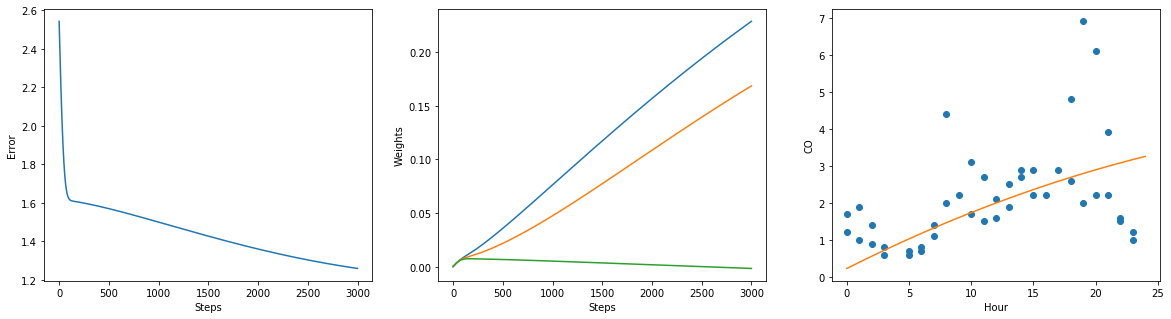

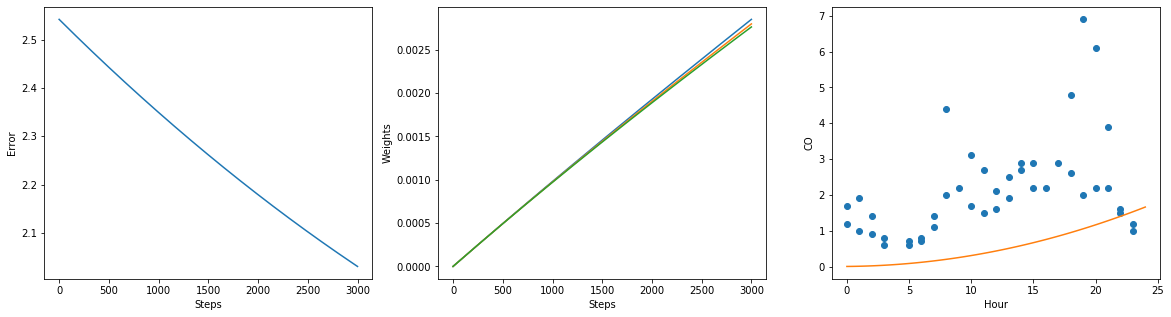

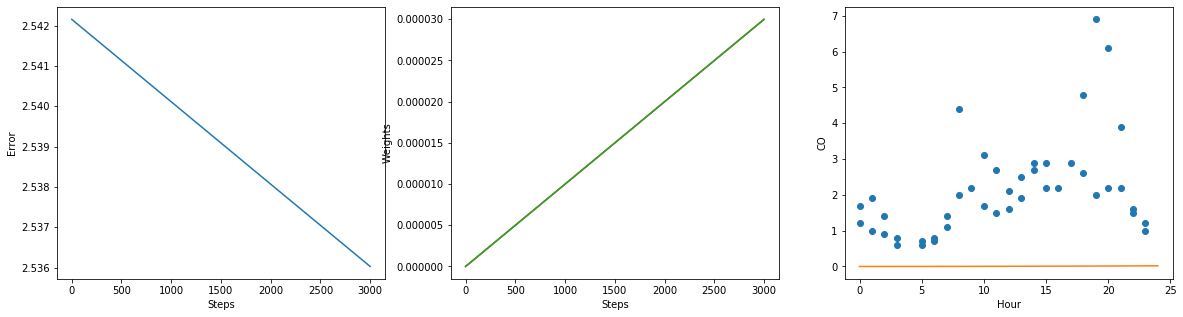

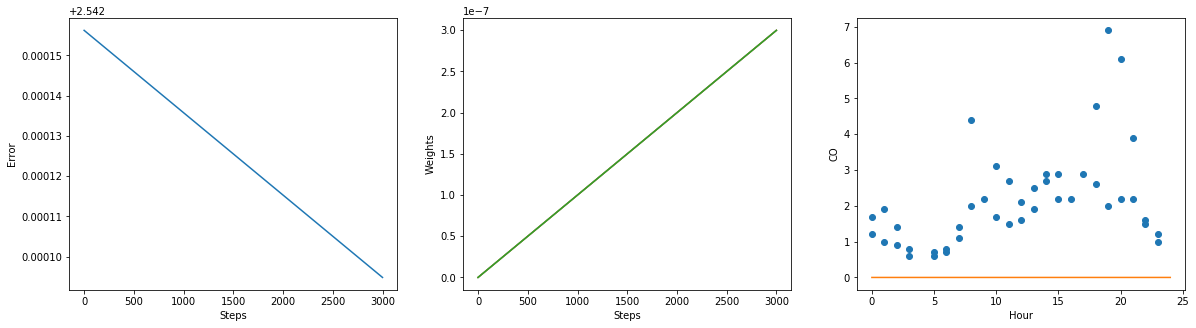

In [79]:
rhos = [1.e-2, 1.e-4, 1.e-6, 1.e-8, 1.e-10]
for i in rhos:
    W = np.zeros((3, 1))
    rho = i 
    n_steps = 3000
    W, error_sequence, W_sequence = gradient_descent_adam(quadratic_model, quadratic_model_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.xlabel('Steps')
    plt.ylabel('Error')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.xlabel('Steps')
    plt.ylabel('Weights')
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 24 , 100).reshape(-1, 1)
    plt.plot(xs, quadratic_model(xs, W));
    plt.xlabel('Hour')
    plt.ylabel('CO')

### Cubic Model with 5 different learning rate

Final RMSE for rho 0.01 at step 3000 is 1.041434
Final RMSE for rho 0.0001 at step 3000 is 1.070287
Final RMSE for rho 1e-06 at step 3000 is 1.339684
Final RMSE for rho 1e-08 at step 3000 is 1.561209
Final RMSE for rho 1e-10 at step 3000 is 1.594072


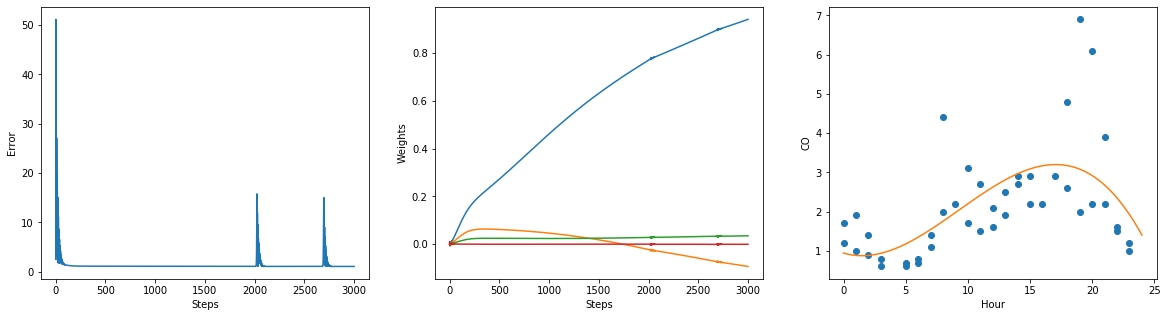

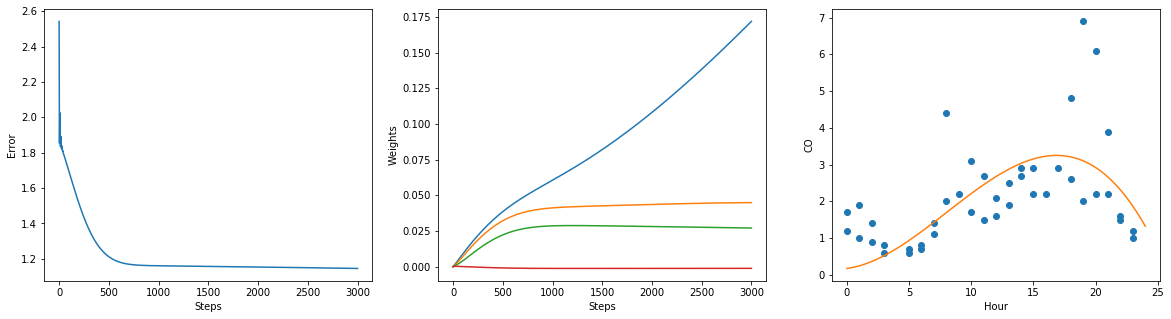

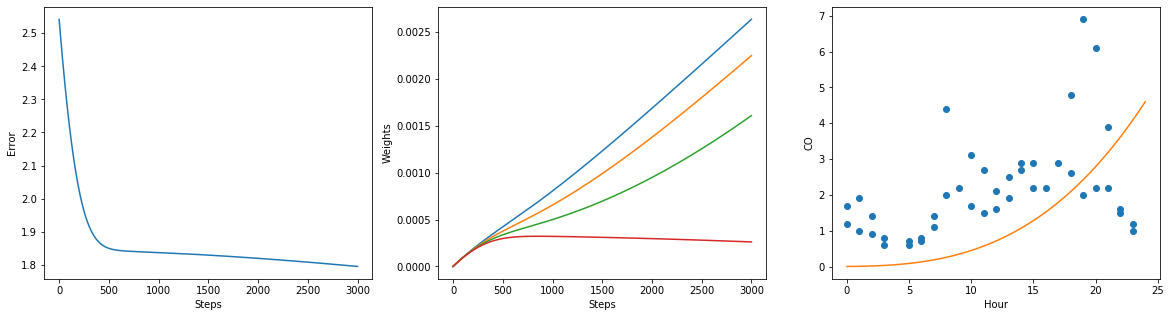

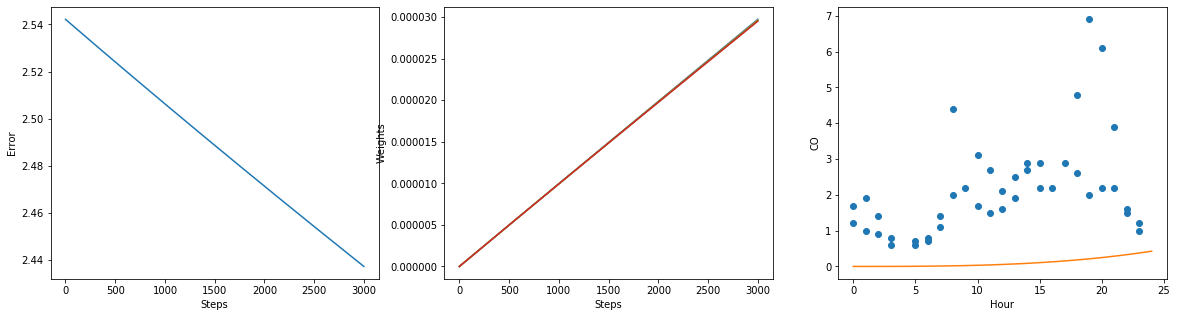

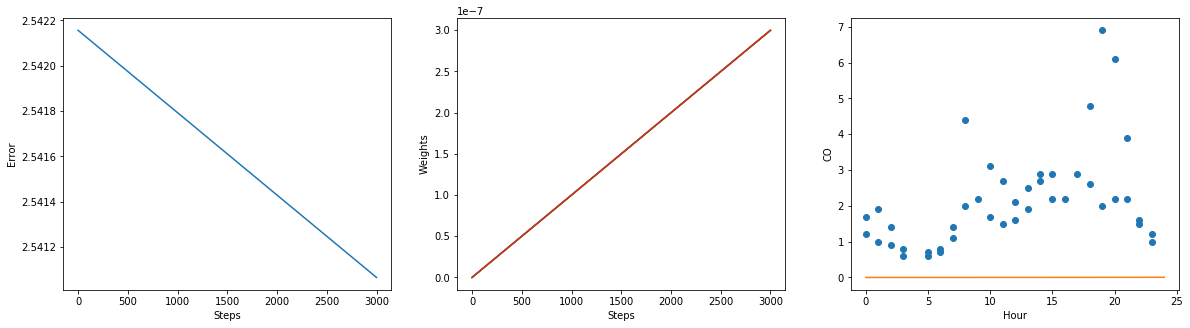

In [80]:
#how should I make sure that I preceeded enough to get the right step for rho???
rhos = [1.e-2, 1.e-4, 1.e-6, 1.e-8, 1.e-10]
for i in rhos:
    W = np.zeros((4, 1))
    rho = i 
    n_steps = 3000
    W, error_sequence, W_sequence = gradient_descent_adam(cubic_model, cubic_model_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.xlabel('Steps')
    plt.ylabel('Error')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.xlabel('Steps')
    plt.ylabel('Weights')
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 24 , 100).reshape(-1, 1)
    plt.plot(xs, cubic_model(xs, W));
    plt.xlabel('Hour')
    plt.ylabel('CO')

### Quartic Model with 5 different learning rate

Final RMSE for rho 0.01 at step 3000 is 1.054535
Final RMSE for rho 0.0001 at step 3000 is 1.751385
Final RMSE for rho 1e-06 at step 3000 is 1.116928
Final RMSE for rho 1e-08 at step 3000 is 1.413977
Final RMSE for rho 1e-10 at step 3000 is 1.588089


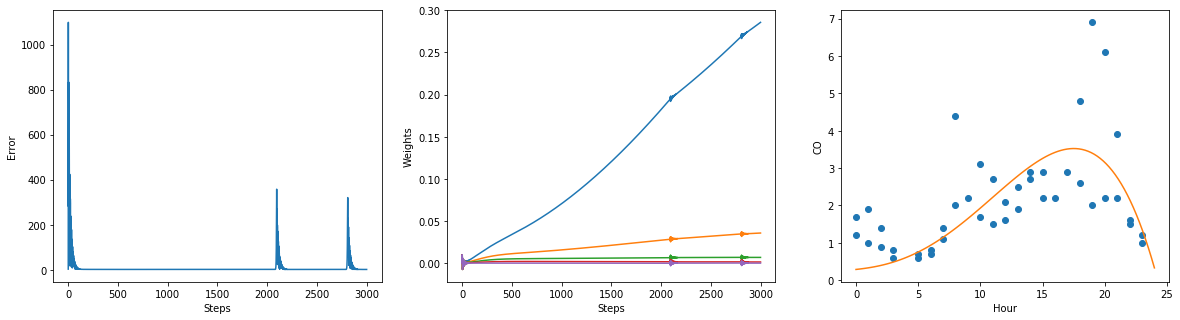

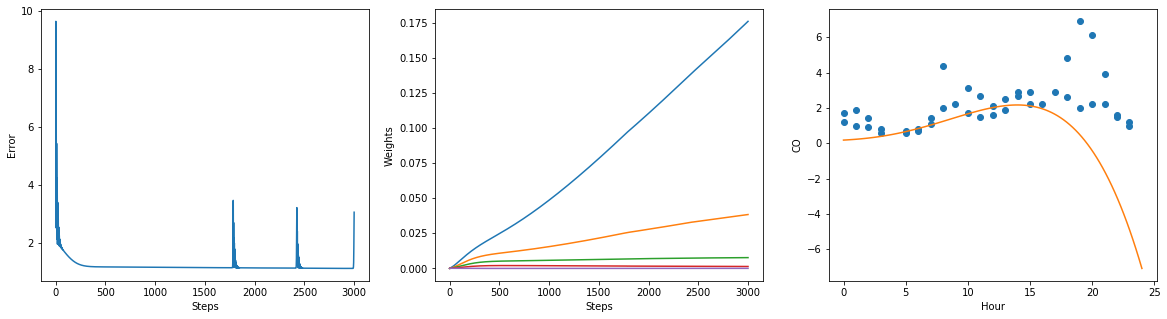

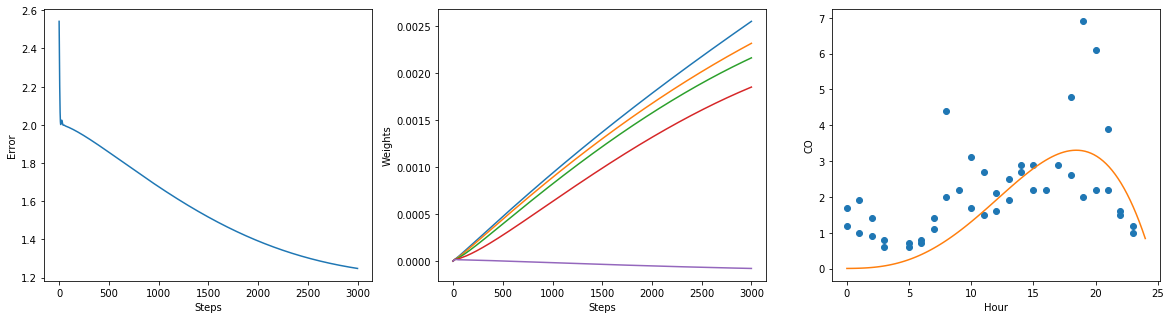

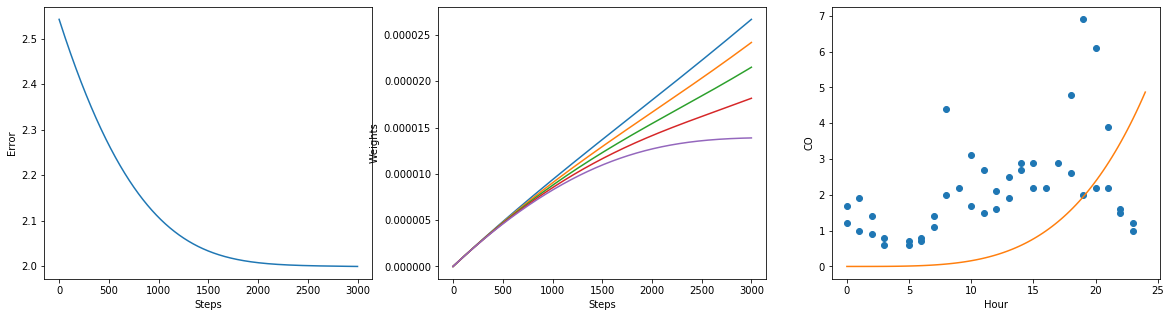

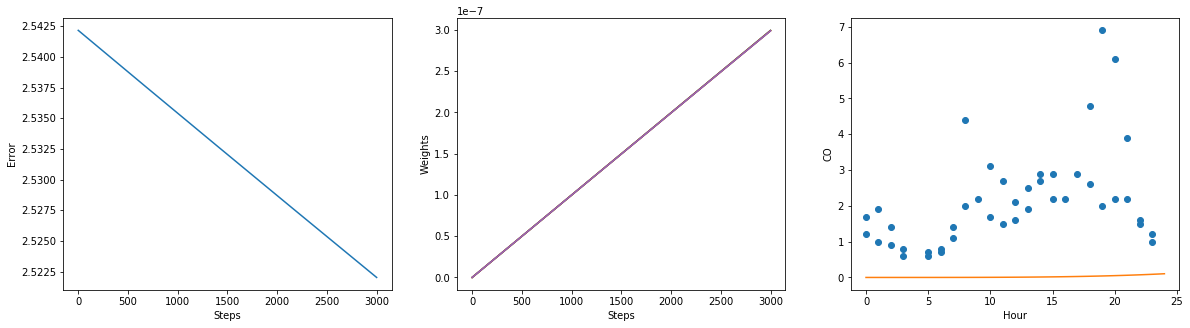

In [81]:
rhos = [1.e-2, 1.e-4, 1.e-6, 1.e-8, 1.e-10]
for i in rhos:
    W = np.zeros((5, 1))
    rho = i 
    n_steps = 3000
    W, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(error_sequence)
    plt.xlabel('Steps')
    plt.ylabel('Error')
    plt.subplot(1, 3, 2)
    plt.plot(W_sequence)
    plt.xlabel('Steps')
    plt.ylabel('Weights')
    plt.subplot(1, 3, 3)
    plt.plot(X, T, 'o')
    xs = np.linspace(0, 24 , 100).reshape(-1, 1)
    plt.plot(xs, quartic_model(xs, W));
    plt.xlabel('Hour')
    plt.ylabel('CO')    

### An observation about spikes in error rates when we use Adam algorithm

Final RMSE for rho 0.01 at step 20000 is 1.028824
Final RMSE for rho 0.0001 at step 20000 is 1.023855


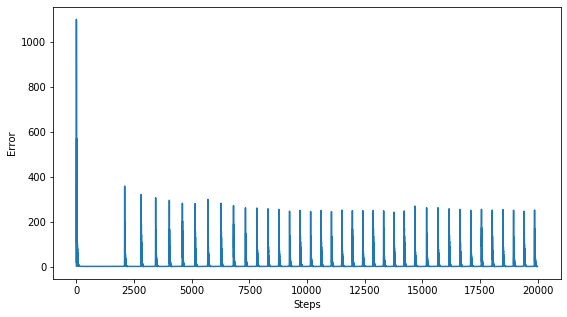

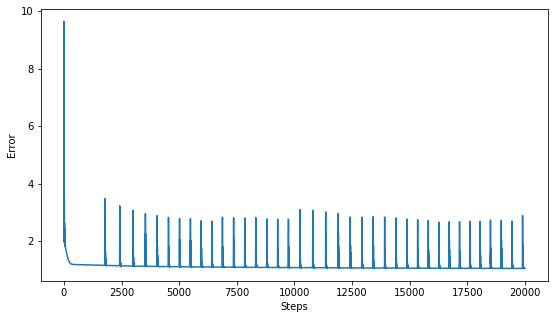

In [82]:
rhos = [1.e-2, 1.e-4]
counter = 0
for i in rhos:
    counter+=1
    W = np.zeros((5, 1))
    rho = i 
    n_steps = 20000
    W, error_sequence, W_sequence = gradient_descent_adam(quartic_model, quartic_model_gradient, rmse, X, T, W, rho, n_steps)
    print(f'Final RMSE for rho {rho} at step {n_steps} is {np.sqrt(error_sequence[-1]):4f}')
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 2)
    plt.plot(error_sequence)
    plt.xlabel('Steps')
    plt.ylabel('Error')

    

I decreased the learning rate for quartic model, but I increased the number of steps. It is obvious as we precede in training process, we get smaller spikes, but it is not coherent. Still, we get better error rate as we increase the steps and decrease the learning rate. 

## Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.zip](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.zip) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 80/80 if your functions are defined correctly. The remaining 20 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [84]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Taheri-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2]).reshape(-1, 1)
  Y = linear_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3]).reshape(-1, 1)
  Y = quadratic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3, 1.5).reshape(-1, 1)
  Y = cubic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  W = np.array([1, 2, -3, 1.5, 0.3]).reshape(-1, 1)
  Y = quartic_model(X, W)

--- 10/10 points. Returned correct values.

Testing
  X = np.array([1, 2, 3

## Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/86986).

Grading will be based on 

  * correct behavior of the required functions listed above,
  * easy to understand plots in your notebook,
  * readability of the notebook,
  * effort in making interesting observations, and in formatting your notebook.